In [3]:
#Configurando o ambiente importando pacotes necessários e base a ser trabalhada
import numpy as np
import pandas as pd
from plotnine import *
df = pd.read_csv("../dados/campeonato-brasileiro-full.csv", delimiter=",")
#Dados do Campeonato Brasileiro Séria A dos últimos 19 anos (2003 a 2022)
#Base disponível e adquirida em https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol

In [13]:
#Dimensões do dataframe e os tipos de variáveis:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [14]:
# Resumo estatístico dos dados
df.describe()

,ID,rodata,mandante_Placar,visitante_Placar
count,8025.000000,8025.000000,8025.000000,8025.000000
mean,4013.000000,20.163240,1.547040,1.024922
std,2316.762288,11.465955,1.232277,1.024076
min,1.000000,1.000000,0.000000,0.000000
25%,2007.000000,10.000000,1.000000,0.000000
50%,4013.000000,20.000000,1.000000,1.000000
75%,6019.000000,30.000000,2.000000,2.000000
max,8025.000000,46.000000,7.000000,7.000000


In [4]:
#Listando uma amostra da base
df.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [9]:
#Tratando a base removendo valores vazios
df.dropna()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
4729,4741,13,3/8/2014,16:00,Chapecoense,Flamengo,4-4-2,4-2-3-1,C. Rodrigues,V. Luxemburgo da Silva,Chapecoense,Arena Condá,1,0,SC,RJ
4797,4808,20,10/9/2014,19:30,Palmeiras,Criciuma,4-2-2-2,4-2-3-1,D. Silvestre Júnior,G. Dal Pozzo,Palmeiras,Estádio Municipal Paulo Machado de Carvalho,1,0,SP,SC
4822,4833,22,17/9/2014,22:00,Coritiba,Sao Paulo,4-3-2-1,4-4-2,M. dos Santos Gonçalves,M. Ramalho,Coritiba,Couto Pereira,3,1,PR,SP
4835,4846,23,21/9/2014,18:30,Gremio,Chapecoense,4-1-4-1,4-2-3-1,L. Scolari,J. da Silva,Gremio,Arena do Grêmio,1,0,RS,SC
4842,4853,24,24/9/2014,22:00,Fluminense,Gremio,4-2-3-1,4-1-4-1,C. Borges dos Santos,L. Scolari,-,Maracanã,0,0,RJ,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP


In [61]:
#Organizando os dados num objeto chamado campeonato_reduzido e selecionando as colunas "vencedor", "visitante" e "mandante":
campeonato_reduzido = df[['vencedor', 'visitante', 'mandante']]
campeonato_reduzido

,vencedor,visitante,mandante
0,Guarani,Vasco,Guarani
1,Athletico-PR,Gremio,Athletico-PR
2,-,Coritiba,Flamengo
3,-,Paysandu,Goias
4,-,Ponte Preta,Internacional
...,...,...,...
8020,Cuiaba,Coritiba,Cuiaba
8021,Fluminense,Fluminense,Bragantino
8022,Atletico-MG,Atletico-MG,Corinthians
8023,Internacional,Palmeiras,Internacional


In [66]:
#Lista dos maiores vencedores absolutos do Campeonato Brasileiro nos últimos 19 anos (2003 a 2022)
visitor = campeonato_reduzido['visitante'].value_counts()
principal = campeonato_reduzido['mandante'].value_counts()
winner = campeonato_reduzido['vencedor'].value_counts()

#Vitorias Top5
VitSaoPaulo = 351
VitFlamengo = 335
VitSantos = 329
VitInternacional = 324
VitCorinthians = 314

#Visitantes Top5
visitorSaoPaulo = 390
visitorFlamengo = 391
visitorSantos = 390
visitorInternacional = 371
visitorCorinthians = 371

#Mandantes Top5
princiaplSaoPaulo = 390
principalFlamengo = 389
principalSantos = 390
principalInternacional = 371
principalConrinthians = 371

#Total Jogos Serie A Top5
GamSaoPaulo = 780
GamFlamengo = 780
GamSantos = 780
GamInternacional = 742
GamCorinthians = 742

#Derrotas Top5
DerSaoPaulo = 429
DerFlamengo = 445
DerSantos = 451
DerInternacional = 418
DerCorinthians = 428

#Visitante vitorioso Top5
visvirSaoPaulo = 175 #esse
visvirFlamengo = 167
visvirSantos = 164
visvirInternacional = 162
visvirCorinthians = 157

#Mandante vitorioso Top5
mandvitSaoPaulo = 214
mandvitFlamengo = 222
mandvitSantos = 225 #esse
mandvitInternacional = 209
mandvitCorinthians = 214

winner



-                  2123
Sao Paulo           351
Flamengo            335
Santos              329
Internacional       324
Corinthians         314
Palmeiras           309
Atletico-MG         308
Fluminense          306
Gremio              295
Athletico-PR        295
Cruzeiro            293
Botafogo-RJ         229
Goias               200
Vasco               196
Coritiba            181
Figueirense         142
Sport               131
Vitoria             123
Bahia               115
Ponte Preta         114
Fortaleza            93
Juventude            85
Parana               83
Atletico-GO          72
Ceara                72
Chapecoense          70
Avai                 66
Sao Caetano          65
Nautico              54
America-MG           53
Criciuma             50
Paysandu             41
Bragantino           38
Guarani              36
Portuguesa           31
Cuiaba               20
Santa Cruz           15
Barueri              12
Santo Andre          11
Brasiliense          10
Ipatinga        

In [108]:
dadosTratados = pd.DataFrame({'Top 5':['SaoPaulo', 'Flamengo', 'Santos', 'Internacional', 'Corinthians']})
#dadosTratados['Quantidade'] = np.where(dadosTratados['Vitoria_TOP5'] == 'Sao Paulo', 351, 335)
clubes = [
            (dadosTratados['Top 5'] == 'SaoPaulo'), 
            (dadosTratados['Top 5'] == 'Flamengo'),
            (dadosTratados['Top 5'] == 'Santos'),
            (dadosTratados['Top 5'] == 'Internacional'),
            (dadosTratados['Top 5'] == 'Corinthians')
        ]
totalvitorias = [351, 335, 329, 324, 314]
totalvisit = [390, 391, 390, 371, 371]
totalmand = [390, 389, 390, 371, 371]
totaljogos = [780, 780, 780, 742, 742]
visitvit = [175, 167, 164, 162, 157]
mandvit = [214, 222, 225, 209, 214]
dadosTratados['Quantidade'] = np.select(clubes, totaljogos, totalvitorias)
dadosTratados


,Top 5,Quantidade
0,SaoPaulo,780
1,Flamengo,780
2,Santos,780
3,Internacional,742
4,Corinthians,742


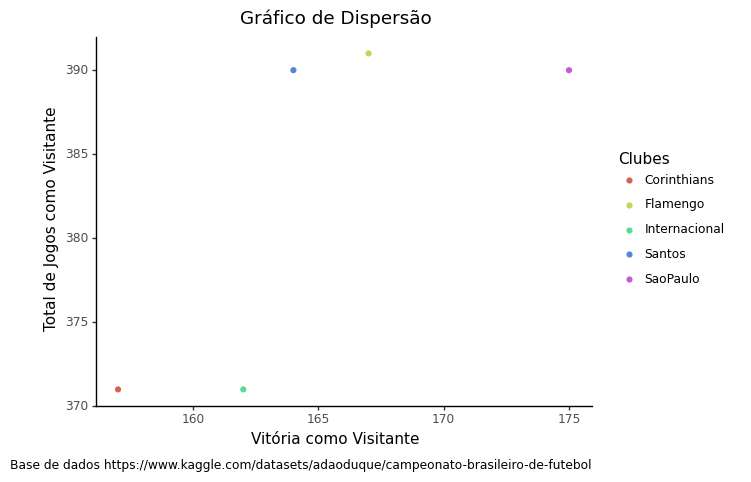

<ggplot: (8781208919767)>

In [133]:
(ggplot(dadosTratados, aes(x="visitvit",
                    y="totalvisit",
#                    size="Top 5",
                    colour="Top 5")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "Vitória como Visitante",
      y = "Total de Jogos como Visitante",
      colour = "Clubes",
      caption = "Base de dados https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol")
)

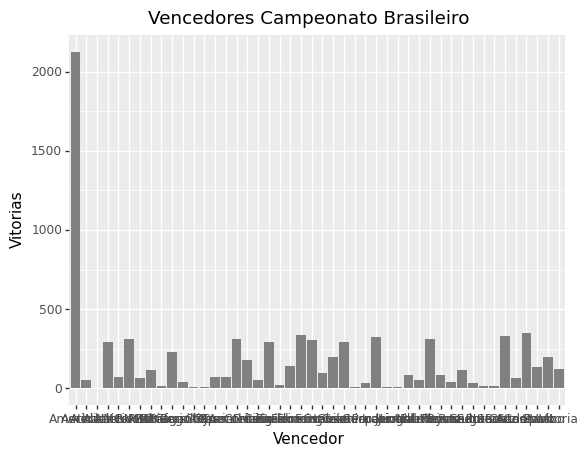

<ggplot: (8781206073534)>

In [64]:
#Hipótese:
#Qual o clube que mais venceu partidas no Campeonato Brasileiro nos últimos 19 anos (2003 a 2022) como visitante?

(ggplot(campeonato_reduzido, aes(x = "vencedor")) +
 geom_bar(fill = "Gray") +
 labs(x = "Vencedor",
      y = "Vitorias",
      title = "Vencedores Campeonato Brasileiro")
)

 #Pelo gráfico gerado, validamos que o maior vencedor do Campeonato Brasileiro nos últimos 19 anos (2003 a 2022) é o Flamengo com 335 vitórias.

In [ ]:
(ggplot(campeonato_reduzido, aes(x="hp",
                    y="drat",
                    size="carb",
                    colour="cyl")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "Potência em HP",
      y = "Relação de transmissão do eixo traseiro",
      colour = "Cilindros",
      caption = "Base de dados mtcars")
)   

In [25]:
#Quantas partidas o Clube Flamengo venceu no Campeonato Brasileiro nos últimos 19 anos (2003 a 2022)?
campeonato_reduzido[["visitante", "vencedor"]].groupby(["vencedor"]).count()
#O Clube Flamengo venceu 335 partidas como visitante no Campeonato Brasileiro nos últimos 19 anos (2003 a 2022).

,visitante
vencedor,
-,2123
America-MG,53
America-RN,4
Athletico-PR,295
Atletico-GO,72
Atletico-MG,308
Avai,66
Bahia,115
Barueri,12
